abrimos el json


In [58]:
# Con estas 2 lineas recargamos automaticamente todos los archivos afiliados al proyecto, sin necesidad de usar el boton de Restart
%load_ext autoreload
%autoreload 2

from modules.open_json import open_json
import folium
 
jsons = list(open_json("../json/mypimes.json"))
geojson = open_json("../json/lha.geojson")

provincia_map = folium.Map(location=(23.133865,-82.3585654))

for i in range(len(jsons)):
        
    folium.Marker(
        location=[jsons[i]["ubicacion"]["lat"], jsons[i]["ubicacion"]["long"]],
        tooltip=f"{jsons[i]["nombre"]}",
        popup= f"<h1>Municipio: {jsons[i]["municipio"]}✅  Horario: {jsons[i]["horario"]} ⏰</h1>",
        icon=folium.Icon(icon="shopping-cart", color="blue")
    ).add_to(provincia_map)
    
folium.GeoJson(geojson,
               style_function= lambda x: {
                   "fillColor": "#93FF69",
                   "color": "#08CB00"
               }
               ).add_to(provincia_map)
folium
    
provincia_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


porciento de bebidas nacionalaes e internacionales que mas se comercializan

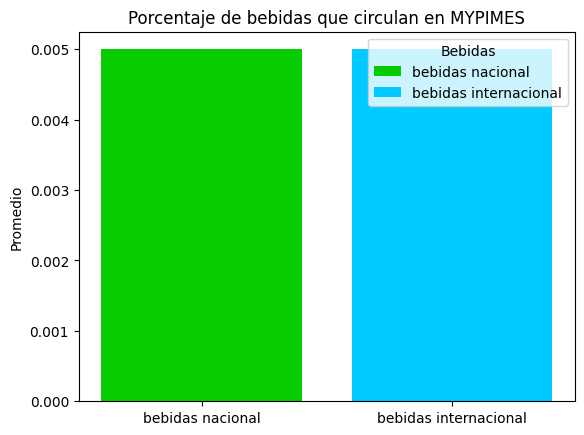

In [59]:

from modules.graphs import porciento

import matplotlib.pyplot as plt
productos = []
for m_productos in jsons:
    productos = m_productos["productos"]

bebida_nacional = []
bebida_internacional = []

for marcas_nacional in productos:
    if marcas_nacional["tipo"] == "bebida":
        
        if marcas_nacional["nacional"] == True:
            bebida_nacional.append(marcas_nacional)
            
        if marcas_nacional["nacional"] == False:            
            bebida_internacional.append(marcas_nacional)

porciento_nacional= porciento(total=len(bebida_internacional) + len(bebida_nacional), parte= len(bebida_nacional))/ 100
porciento_internacional = porciento(total=len(bebida_internacional) + len(bebida_nacional), parte= len(bebida_internacional))/ 100


fig , ax = plt.subplots()

ax.bar(["bebidas nacional", "bebidas internacional"],[porciento_internacional, porciento_nacional], label=["bebidas nacional", "bebidas internacional"], color= ["#08CB00", "#00CAFF"])
ax.set_ylabel("Promedio")
ax.legend(title='Bebidas')
ax.set_title("Porcentaje de bebidas que circulan en MYPIMES")
plt.show()      
        

marcas que mas se comercializan

C:\Users\Daniela\AppData\Local\Temp\ipykernel_12052\2701590021.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(brands, rotation=45, ha='right')


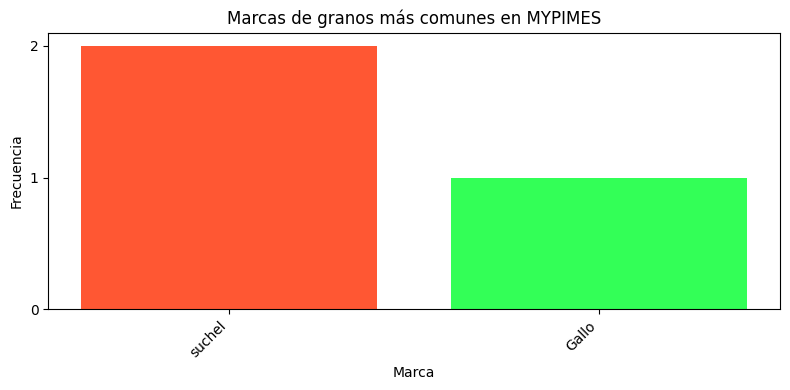

In [62]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
marcas_granos = []
for elementos in productos:
    if elementos.get("tipo") == "granos":
        marcas_granos.append(elementos.get("marca"))
counts = Counter(marcas_granos)

if counts:
    brands, freqs = zip(*counts.most_common())
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = ["#FF5733", "#33FF57", "#3357FF", "#F333FF", "#33FFF5"]
    ax.bar(brands, freqs, color=colors)
    ax.set_title("Marcas de granos más comunes en MYPIMES")
    ax.set_ylabel("Frecuencia")
    ax.set_xlabel("Marca")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticklabels(brands, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    